<center>

| Nazwa przedmiotu                          | Dataset                                |
| ----------------------------------------- | -------------------------------------- |
| Projekt zespołowy - sztuczna inteligencja | laptop_prices_dataset                  |
|                                           |                                        |
| Piotr                                     | Goraj                                  |
| Numer albumu                              | 55529                                  |
|                                           |                                        |
| Bartosz                                   | Kiałka                                 |
| Numer albumu                              | 55528                                  |
|                                           |                                        |
| Data oddania sprawozdania                 | 2024.11.16                             |
| Kierunek                                  | Informatyka, II stopnia P, Stacjonarne |

</center>


Nazwa przedmiotu: Projekt zespołowy - sztuczna inteligencja

Kierunek: Informatyka, II stopnia P, Stacjonarne

Dataset: laptop_prices_dataset https://www.kaggle.com/datasets/owm4096/laptop-prices/data



Autorzy:

Piotr Goraj, nr. alb. 55529

Bartosz Kiałka, nr. alb. 55528



Data oddania sprawozdania: 2024.11.16

## 1. Instalacja i import bibliotek

In [56]:
# !pip install pandas
# !pip install scikit-learn
# !pip install numpy
# !pip install shap
# !pip install matplotlib
# !pip install seaborn
# !pip install --upgrade shap scikit-learn pandas numpy matplotlib

# !pip install --upgrade shap scikit-learn pandas numpy matplotlib
# !pip install --upgrade shap
#!pip install --upgrade matplotlib seaborn scikit-learn
#!pip install --upgrade matplotlib
#!pip install matplotlib








In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
import seaborn as sns

## 2. Odczyt danych do modelu

In [58]:
TRAIN_FILE_PATH = './train_data.csv'
VAL_FILE_PATH = './val_data.csv'
TEST_FILE_PATH = './val_data.csv'

train_model_data = pd.read_csv(TRAIN_FILE_PATH)
val_model_data = pd.read_csv(VAL_FILE_PATH)
test_model_data = pd.read_csv(TEST_FILE_PATH)

## 3. Model predykcyjny - Regresja

## 4. Wykres Sumaryczny Wartości SHAP

Brakujące wartości w danych treningowych:
Company               0
TypeName              0
Inches                0
Ram                   0
Price_euros           0
Touchscreen           0
CPU_freq              0
CPU_model             0
GPU_model             0
OS_No OS              0
OS_Other              0
OS_Windows 10         0
OS_Windows 7          0
GPU_company_ARM       0
GPU_company_Intel     0
GPU_company_Nvidia    0
dtype: int64

Brakujące wartości w danych walidacyjnych:
Company               0
TypeName              0
Inches                0
Ram                   0
Price_euros           0
Touchscreen           0
CPU_freq              0
CPU_model             0
GPU_model             0
OS_No OS              0
OS_Other              0
OS_Windows 10         0
OS_Windows 7          0
GPU_company_Intel     0
GPU_company_Nvidia    0
GPU_company_ARM       0
dtype: int64

Rzeczywiste nazwy cech po kodowaniu (przykład):
['Company', 'TypeName', 'Inches', 'Ram', 'Touchscreen', 'CPU_freq', 'CP

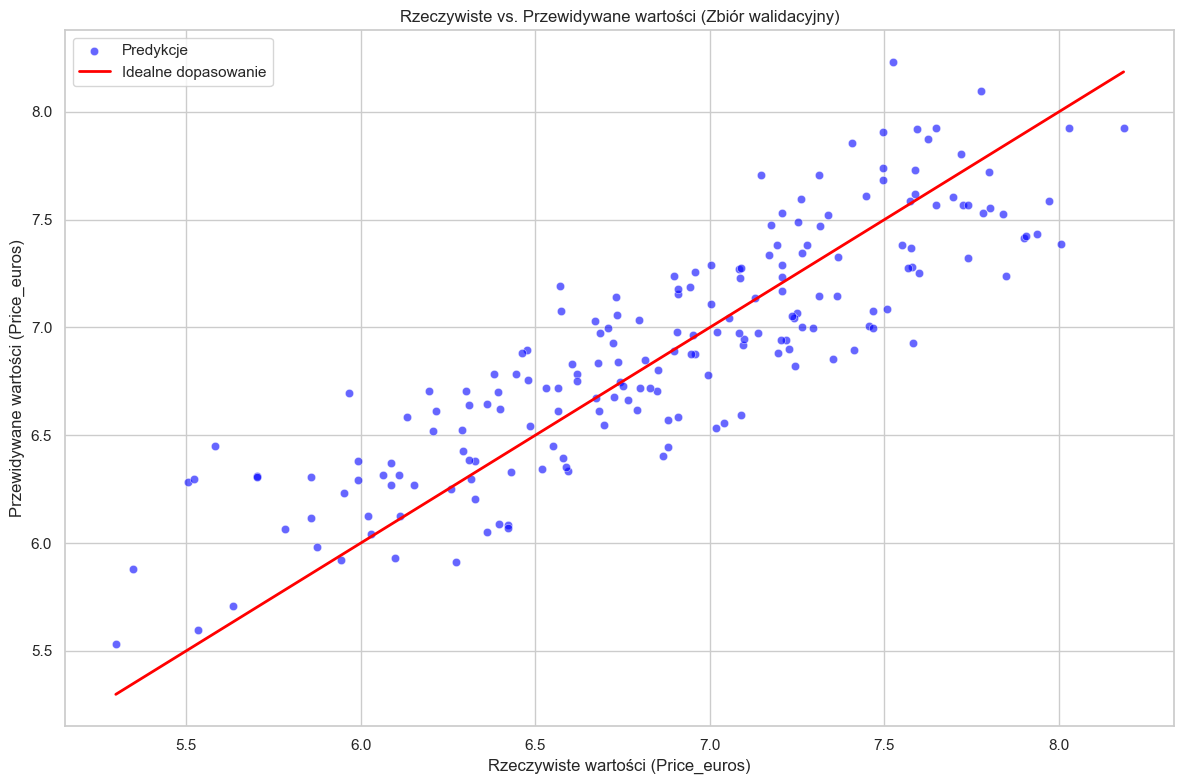

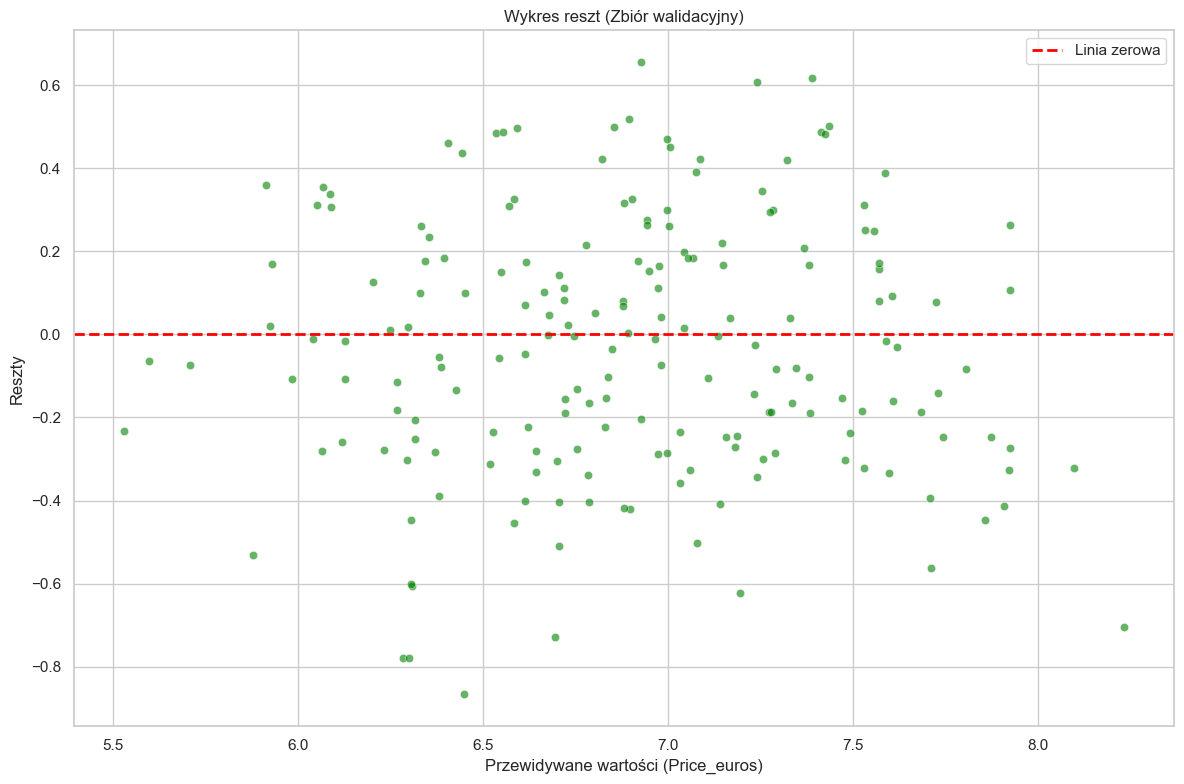

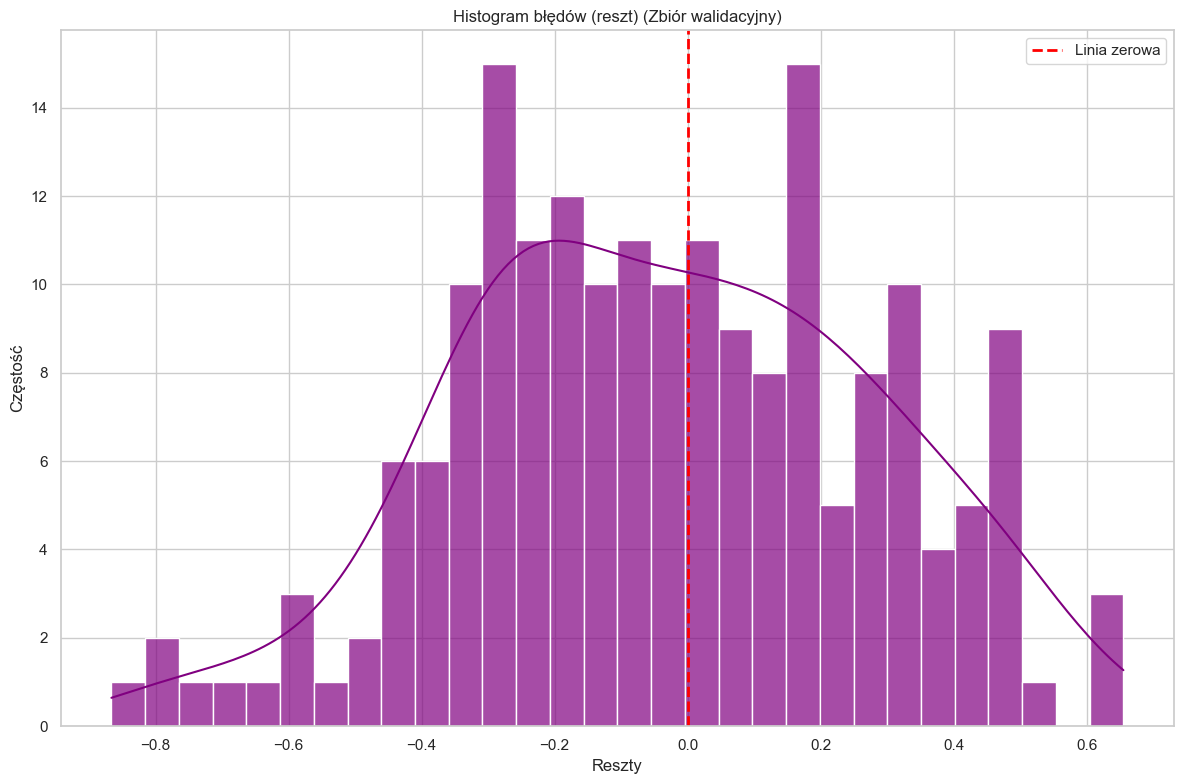


Najważniejsze cechy wpływające na cenę:
               Feature  Coefficient
3                  Ram     0.346928
14  GPU_company_Nvidia     0.190164
5             CPU_freq     0.141547
1             TypeName     0.134352
13   GPU_company_Intel     0.104517
11        OS_Windows 7     0.093249
0              Company     0.068324
7            GPU_model     0.058111
8             OS_No OS    -0.056071
10       OS_Windows 10     0.050406


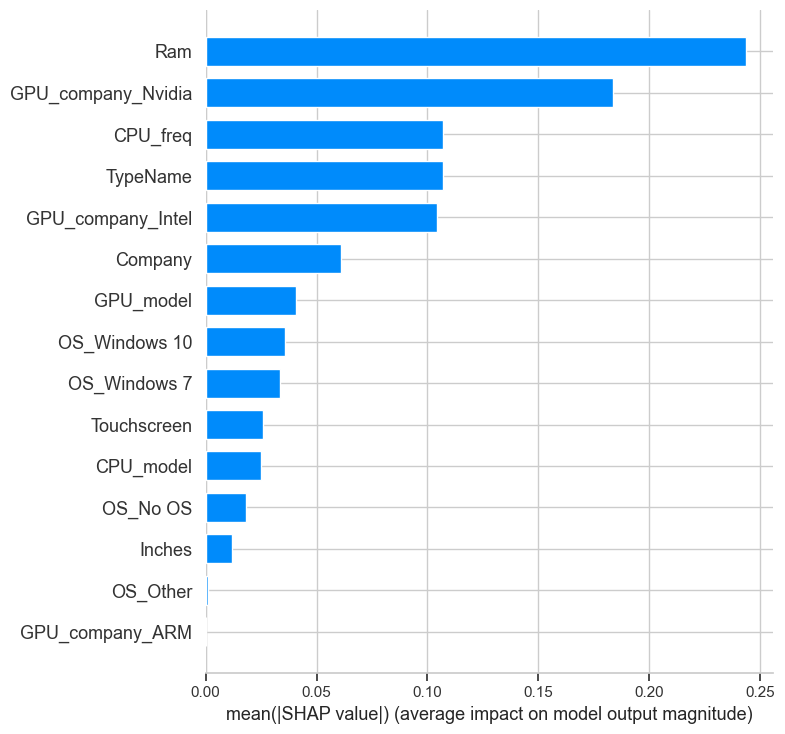

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

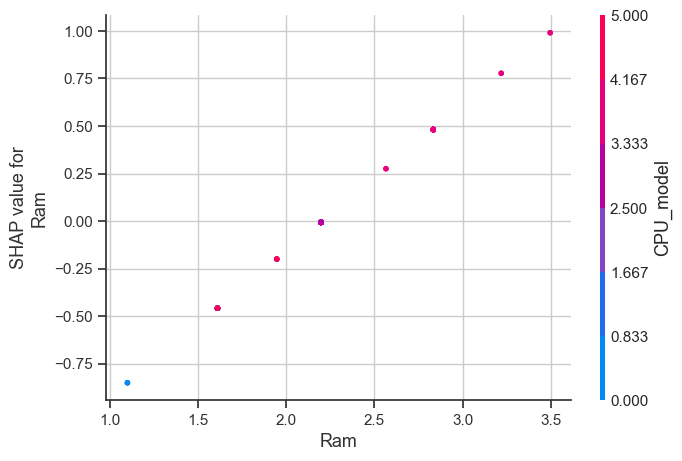

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

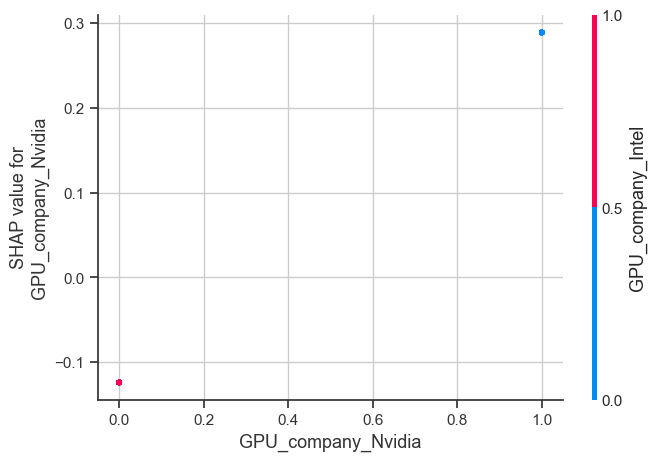

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

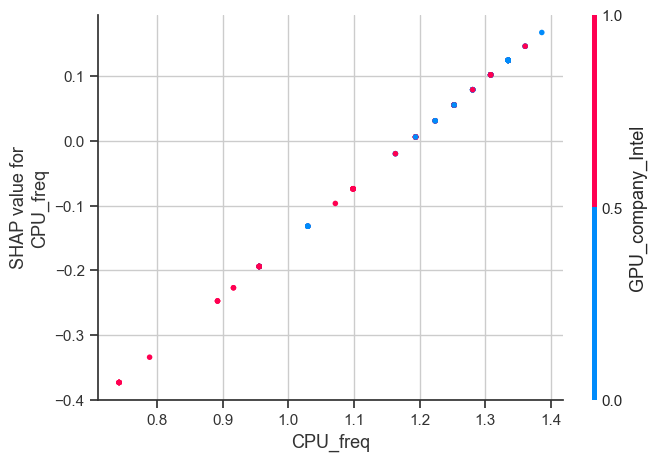

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

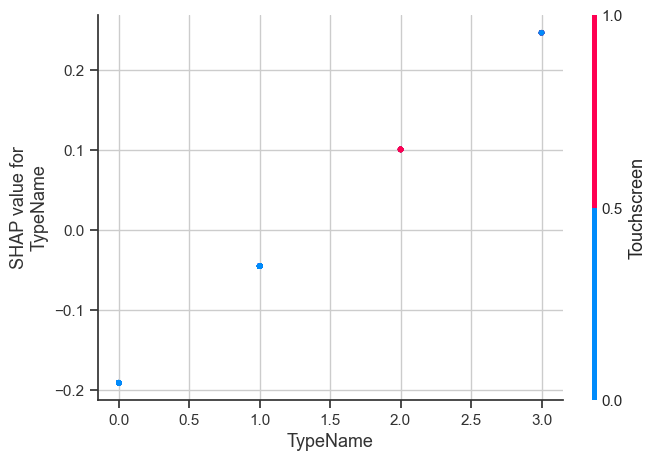

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

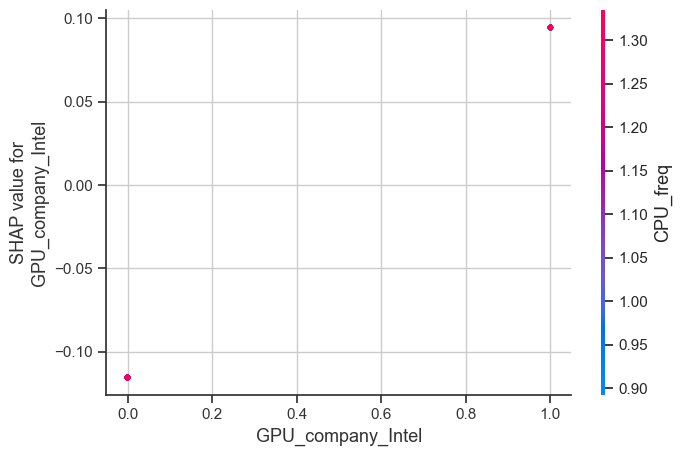

<Figure size 640x480 with 0 Axes>


Zapisano modele i inne obiekty do plików.


In [59]:
# Import niezbędnych bibliotek
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Do zapisywania i ładowania obiektów

# Konfiguracja stylu wykresów
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})  # Ustawienie większego rozmiaru czcionki

# 1. Odczyt danych
TRAIN_FILE_PATH = './train_data.csv'  # Upewnij się, że ścieżka jest poprawna
VAL_FILE_PATH = './val_data.csv'      # Upewnij się, że ścieżka jest poprawna

train_data = pd.read_csv(TRAIN_FILE_PATH)
val_data = pd.read_csv(VAL_FILE_PATH)

# 2. Przygotowanie danych

# Sprawdzenie wartości brakujących
print("Brakujące wartości w danych treningowych:")
print(train_data.isnull().sum())

print("\nBrakujące wartości w danych walidacyjnych:")
print(val_data.isnull().sum())

# Usunięcie wierszy z brakującymi wartościami
train_data = train_data.dropna()
val_data = val_data.dropna()

# Podział na cechy i zmienną docelową
X_train = train_data.drop(columns=['Price_euros'])  # Upewnij się, że nazwa kolumny jest poprawna
y_train = train_data['Price_euros']

X_val = val_data.drop(columns=['Price_euros'])      # Upewnij się, że nazwa kolumny jest poprawna
y_val = val_data['Price_euros']

# Kodowanie cech kategorycznych
# Łączymy dane treningowe i walidacyjne, aby zapewnić spójne kodowanie
X_combined = pd.concat([X_train, X_val], axis=0)
X_combined = pd.get_dummies(X_combined, drop_first=True)

# Rozdzielenie z powrotem na zbiór treningowy i walidacyjny
X_train_encoded = X_combined.iloc[:len(X_train), :].reset_index(drop=True)
X_val_encoded = X_combined.iloc[len(X_train):, :].reset_index(drop=True)

# Wyświetlenie rzeczywistych nazw cech po kodowaniu
print("\nRzeczywiste nazwy cech po kodowaniu (przykład):")
print(X_train_encoded.columns.tolist()[:10])  # Wyświetlenie pierwszych 10 cech

# Sprawdzenie pełnej listy cech
print("\nLista wszystkich cech po kodowaniu zbioru treningowego:")
print(X_train_encoded.columns.tolist())

# 3. Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# Konwersja przeskalowanych danych z powrotem do DataFrame z nazwami kolumn
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val_encoded.columns)

# 4. Trenowanie modelu regresji liniowej
regression_model = LinearRegression()
regression_model.fit(X_train_scaled_df, y_train)

# 5. Walidacja modelu
y_val_pred = regression_model.predict(X_val_scaled_df)
r2_val = r2_score(y_val, y_val_pred)
print("\nWynik R² na zbiorze walidacyjnym:", r2_val)

# Obliczenie reszt
residuals_val = y_val - y_val_pred

# 6. Wizualizacja wyników na zbiorze walidacyjnym

# Wykres rzeczywiste vs. przewidywane wartości
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, color='blue', label='Predykcje')
plt.plot(
    [y_val.min(), y_val.max()],
    [y_val.min(), y_val.max()],
    color='red',
    lw=2,
    label='Idealne dopasowanie'
)
plt.title("Rzeczywiste vs. Przewidywane wartości (Zbiór walidacyjny)")
plt.xlabel("Rzeczywiste wartości (Price_euros)")
plt.ylabel("Przewidywane wartości (Price_euros)")
plt.legend()
plt.tight_layout()
plt.show()

# Wykres reszt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_val_pred, y=residuals_val, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--', lw=2, label="Linia zerowa")
plt.title("Wykres reszt (Zbiór walidacyjny)")
plt.xlabel("Przewidywane wartości (Price_euros)")
plt.ylabel("Reszty")
plt.legend()
plt.tight_layout()
plt.show()

# Histogram błędów (reszt)
plt.figure(figsize=(12, 8))
sns.histplot(residuals_val, kde=True, bins=30, color='purple', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', lw=2, label="Linia zerowa")
plt.title("Histogram błędów (reszt) (Zbiór walidacyjny)")
plt.xlabel("Reszty")
plt.ylabel("Częstość")
plt.legend()
plt.tight_layout()
plt.show()

# 7. Wykorzystanie wartości SHAP do interpretacji modelu

# Tworzenie wyjaśniacza SHAP
explainer = shap.Explainer(regression_model, X_train_scaled_df)
shap_values = explainer(X_val_scaled_df)

# Analiza ważności cech na podstawie współczynników regresji
coefficients = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coefficient': regression_model.coef_
})
coefficients['Importance'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Importance', ascending=False)

print("\nNajważniejsze cechy wpływające na cenę:")
print(coefficients[['Feature', 'Coefficient']].head(10))

# Zwiększenie rozmiaru wykresu i rotacja etykiet
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_val_encoded, plot_type="bar")
plt.tight_layout()
plt.show()

# Automatyczne tworzenie wykresów zależności dla top 5 cech
top_features = coefficients['Feature'].head(5).values
for feature in top_features:
    if feature in X_val_encoded.columns:
        plt.figure(figsize=(14, 10))
        shap.dependence_plot(feature, shap_values.values, X_val_encoded)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cecha '{feature}' nie istnieje w danych walidacyjnych.")

# 8. Zapisanie niezbędnych obiektów do plików

# Zapisz model regresji
joblib.dump(regression_model, 'regression_model.pkl')

# Zapisz scaler
joblib.dump(scaler, 'scaler.pkl')

# Zapisz kolumny cech
joblib.dump(X_train_encoded.columns, 'feature_columns.pkl')

# Zapisz współczynniki
joblib.dump(coefficients, 'coefficients.pkl')

# Zapisz top_features
joblib.dump(top_features, 'top_features.pkl')

# Zapisz explainer SHAP
joblib.dump(explainer, 'shap_explainer.pkl')

print("\nZapisano modele i inne obiekty do plików.")

## 5. Model klasyfikacji - Wartości Shapleya i interpretacja


Brakujące wartości w danych testowych:
Company               0
TypeName              0
Inches                0
Ram                   0
Price_euros           0
Touchscreen           0
CPU_freq              0
CPU_model             0
GPU_model             0
OS_No OS              0
OS_Other              0
OS_Windows 10         0
OS_Windows 7          0
GPU_company_Intel     0
GPU_company_Nvidia    0
GPU_company_ARM       0
dtype: int64

Rzeczywiste nazwy cech po kodowaniu danych testowych (przykład):
['Company', 'TypeName', 'Inches', 'Ram', 'Touchscreen', 'CPU_freq', 'CPU_model', 'GPU_model', 'OS_No OS', 'OS_Other']

Lista wszystkich cech po kodowaniu zbioru testowego:
['Company', 'TypeName', 'Inches', 'Ram', 'Touchscreen', 'CPU_freq', 'CPU_model', 'GPU_model', 'OS_No OS', 'OS_Other', 'OS_Windows 10', 'OS_Windows 7', 'GPU_company_ARM', 'GPU_company_Intel', 'GPU_company_Nvidia']

Wynik R² na zbiorze testowym: 0.7121513392921521
Mean Absolute Error (MAE) na zbiorze testowym: 0.2533584296359

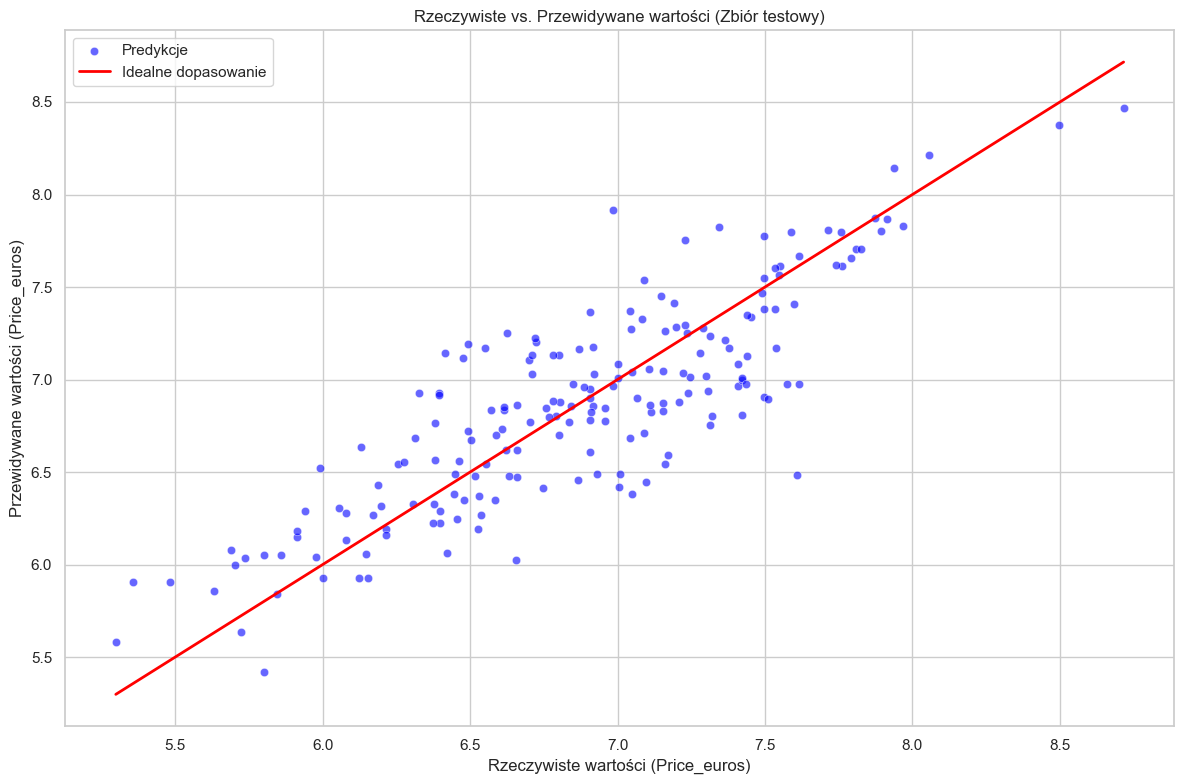

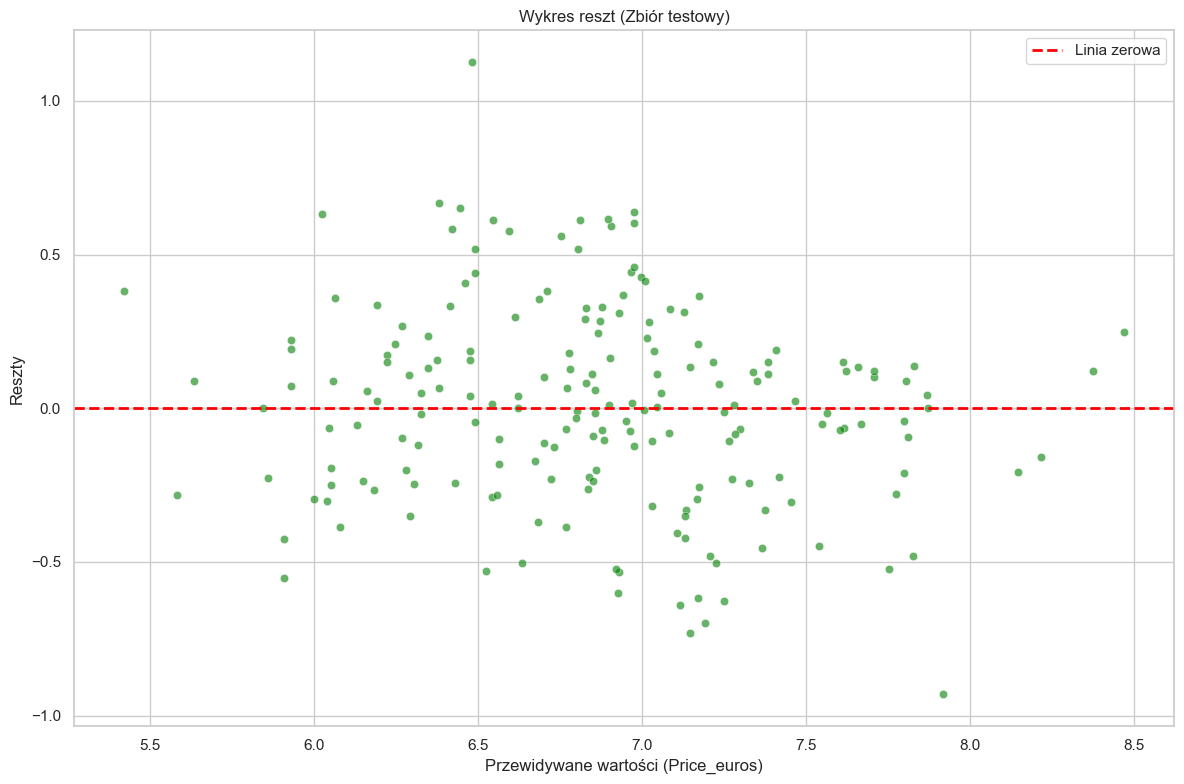

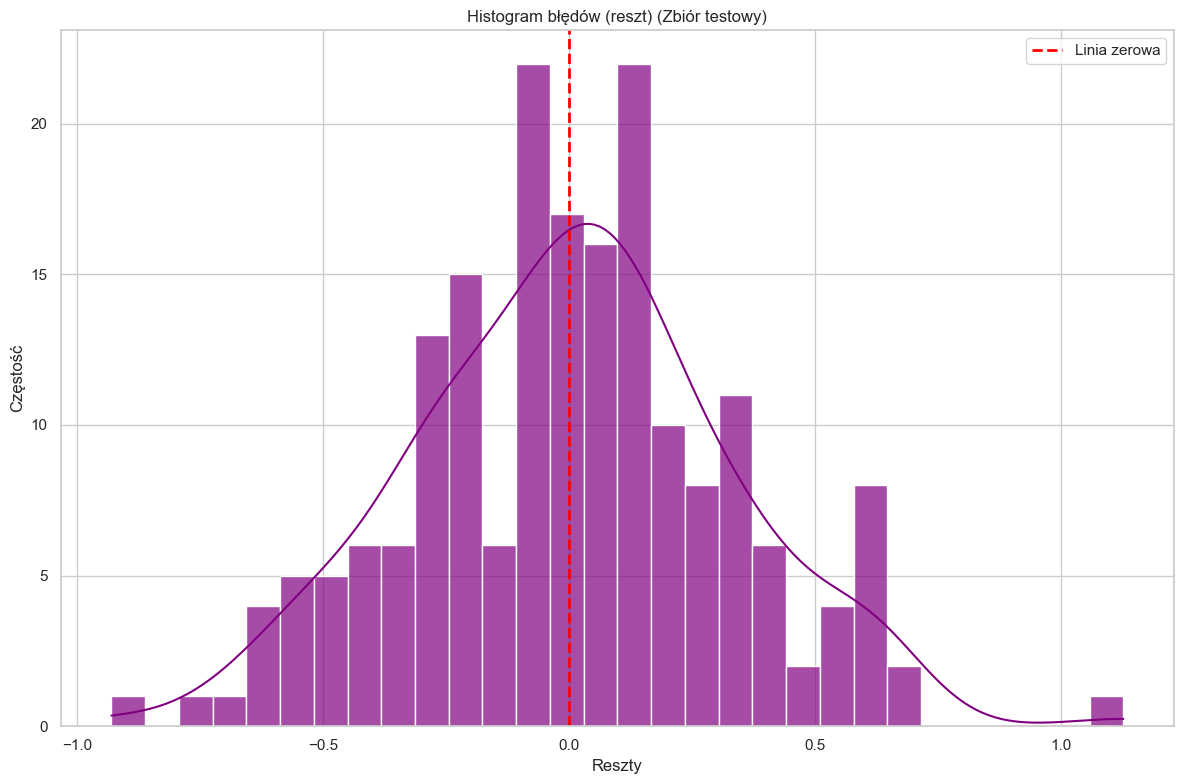

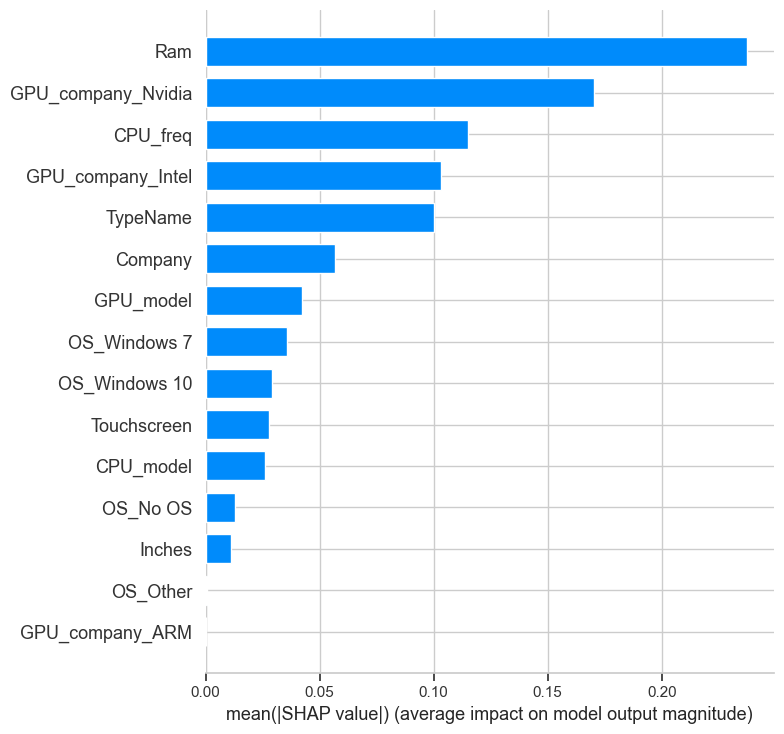

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

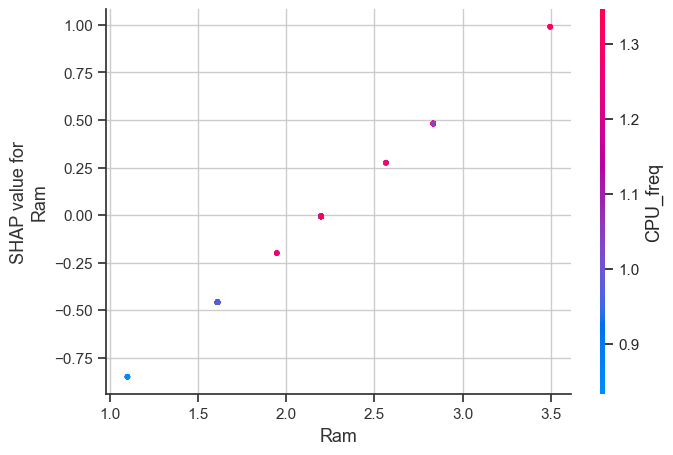

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

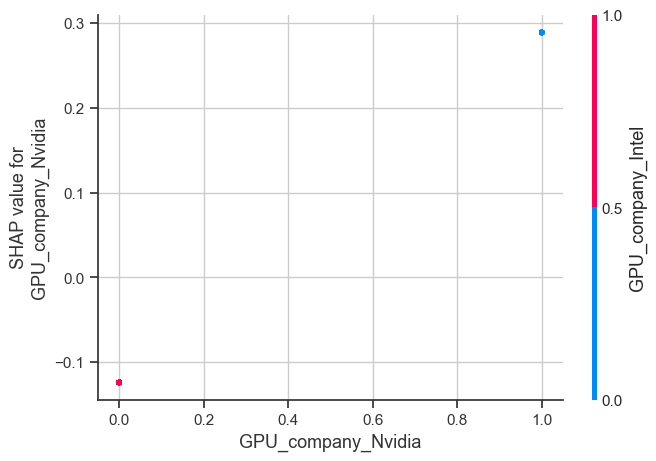

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

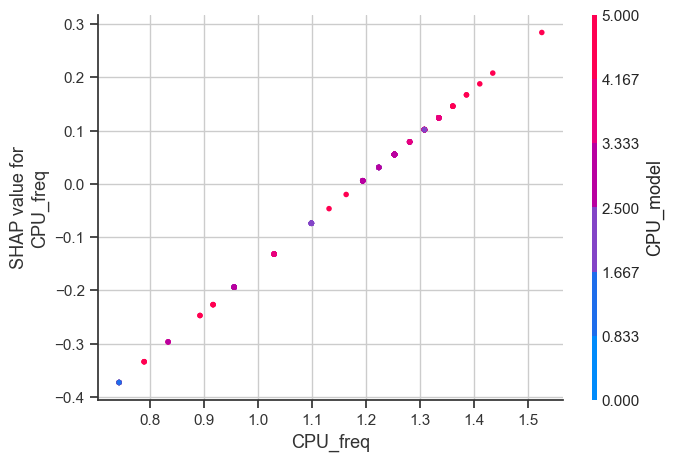

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

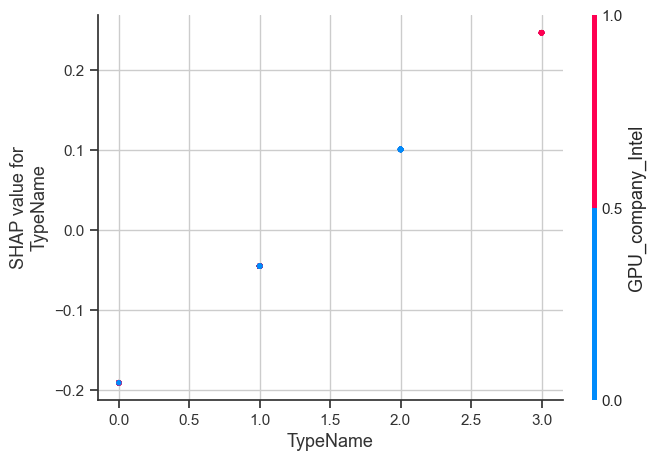

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

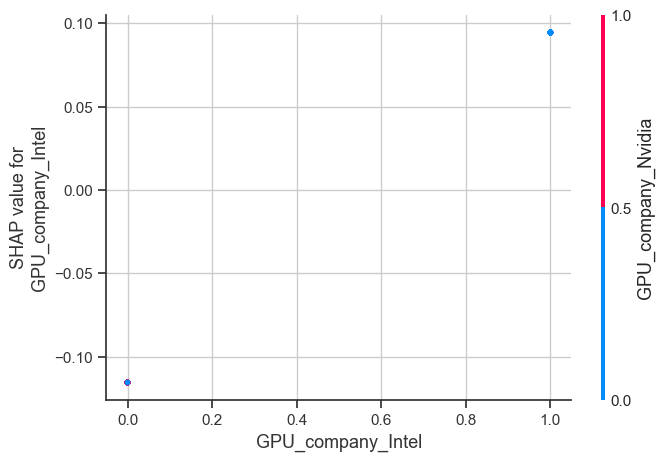

<Figure size 640x480 with 0 Axes>


Najważniejsze cechy wpływające na cenę:
               Feature  Coefficient
3                  Ram     0.346928
14  GPU_company_Nvidia     0.190164
5             CPU_freq     0.141547
1             TypeName     0.134352
13   GPU_company_Intel     0.104517
11        OS_Windows 7     0.093249
0              Company     0.068324
7            GPU_model     0.058111
8             OS_No OS    -0.056071
10       OS_Windows 10     0.050406


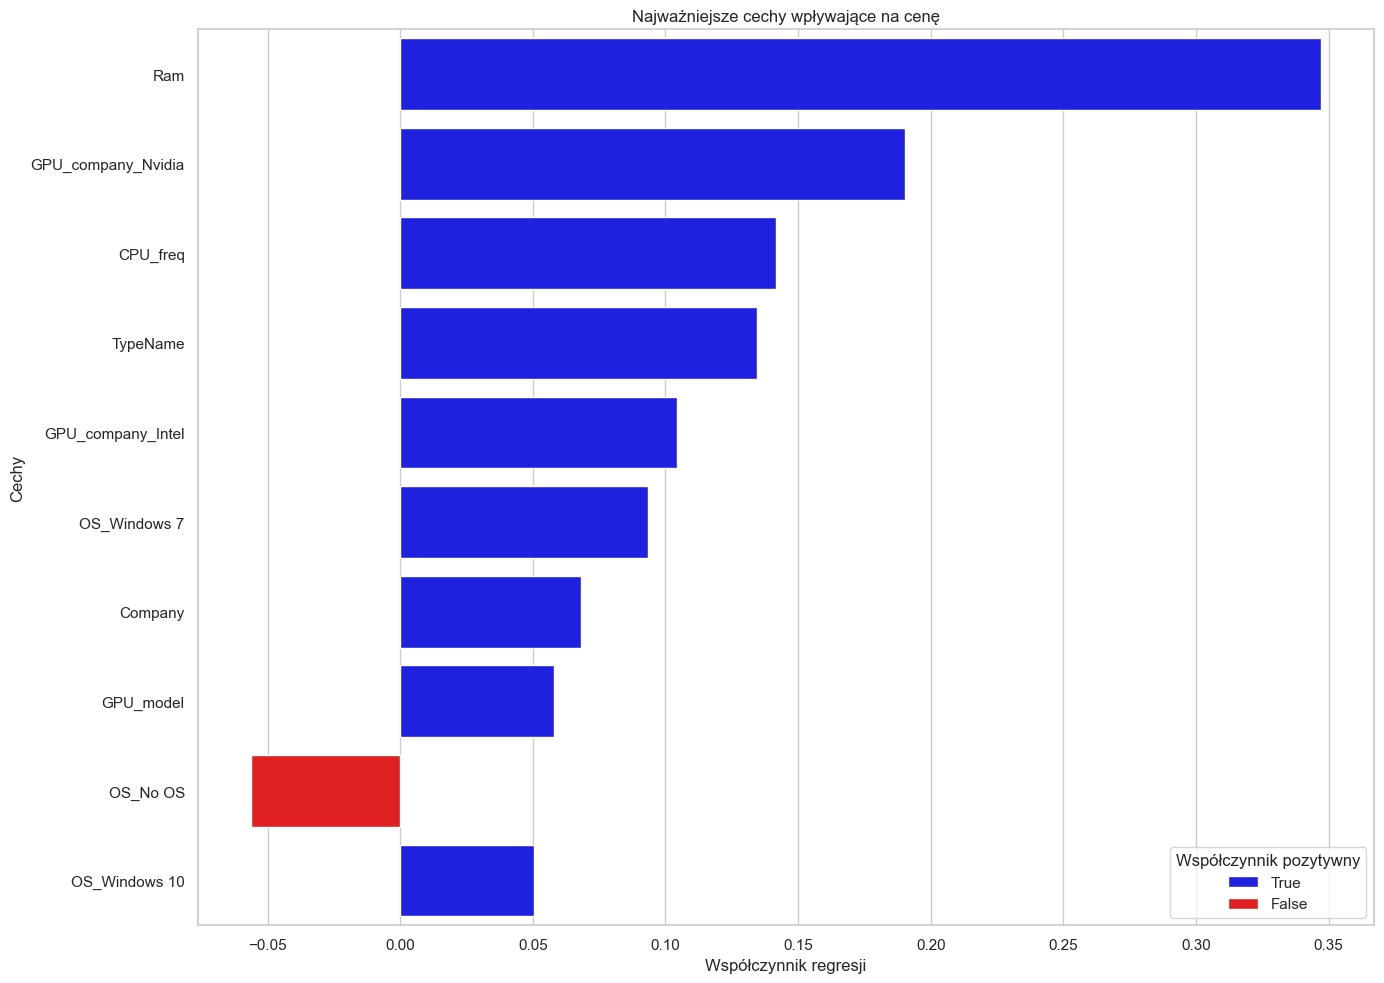


Wnioski:
- Model został przetrenowany na zbiorze treningowym i zwalidowany na zbiorze walidacyjnym.
- Ostateczna ocena modelu została przeprowadzona na zbiorze testowym, co daje wiarygodną miarę jego wydajności na nowych danych.
- Wartości SHAP pomogły w interpretacji wpływu poszczególnych cech na przewidywaną cenę.
- Najważniejsze cechy wpływające na cenę to: Ram, GPU_company_Nvidia, CPU_freq, TypeName, GPU_company_Intel


In [60]:

# Import niezbędnych bibliotek
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Do ładowania obiektów

# Konfiguracja stylu wykresów
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})  # Ustawienie większego rozmiaru czcionki

# 1. Ładowanie wcześniej zapisanych obiektów
regression_model = joblib.load('regression_model.pkl')
scaler = joblib.load('scaler.pkl')
feature_columns = joblib.load('feature_columns.pkl')
coefficients = joblib.load('coefficients.pkl')
top_features = joblib.load('top_features.pkl')
explainer = joblib.load('shap_explainer.pkl')

# 2. Odczyt danych testowych
TEST_FILE_PATH = './test_data.csv'  # Upewnij się, że ścieżka jest poprawna

test_data = pd.read_csv(TEST_FILE_PATH)

# Sprawdzenie wartości brakujących
print("\nBrakujące wartości w danych testowych:")
print(test_data.isnull().sum())

# Usunięcie wierszy z brakującymi wartościami
test_data = test_data.dropna()

# Podział na cechy i zmienną docelową
X_test = test_data.drop(columns=['Price_euros'])  # Upewnij się, że nazwa kolumny jest poprawna
y_test = test_data['Price_euros']

# Kodowanie cech kategorycznych w danych testowych
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Dodanie brakujących kolumn w danych testowych, które były obecne w danych treningowych
missing_cols = set(feature_columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

# Upewnienie się, że kolejność kolumn jest taka sama jak w danych treningowych
X_test_encoded = X_test_encoded[feature_columns]

# Wyświetlenie rzeczywistych nazw cech po kodowaniu
print("\nRzeczywiste nazwy cech po kodowaniu danych testowych (przykład):")
print(X_test_encoded.columns.tolist()[:10])  # Wyświetlenie pierwszych 10 cech

# Sprawdzenie pełnej listy cech
print("\nLista wszystkich cech po kodowaniu zbioru testowego:")
print(X_test_encoded.columns.tolist())

# Skalowanie danych testowych
X_test_scaled = scaler.transform(X_test_encoded)

# Konwersja przeskalowanych danych z powrotem do DataFrame z nazwami kolumn
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

# 3. Ocena modelu na zbiorze testowym
y_test_pred = regression_model.predict(X_test_scaled_df)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nWynik R² na zbiorze testowym:", r2_test)
print("Mean Absolute Error (MAE) na zbiorze testowym:", mae_test)
print("Root Mean Squared Error (RMSE) na zbiorze testowym:", rmse_test)

# Obliczenie reszt
residuals_test = y_test - y_test_pred

# 4. Wizualizacja wyników na zbiorze testowym

# Wykres rzeczywiste vs. przewidywane wartości
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, color='blue', label='Predykcje')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    lw=2,
    label='Idealne dopasowanie'
)
plt.title("Rzeczywiste vs. Przewidywane wartości (Zbiór testowy)")
plt.xlabel("Rzeczywiste wartości (Price_euros)")
plt.ylabel("Przewidywane wartości (Price_euros)")
plt.legend()
plt.tight_layout()
plt.show()

# Wykres reszt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test_pred, y=residuals_test, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--', lw=2, label="Linia zerowa")
plt.title("Wykres reszt (Zbiór testowy)")
plt.xlabel("Przewidywane wartości (Price_euros)")
plt.ylabel("Reszty")
plt.legend()
plt.tight_layout()
plt.show()

# Histogram błędów (reszt)
plt.figure(figsize=(12, 8))
sns.histplot(residuals_test, kde=True, bins=30, color='purple', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', lw=2, label="Linia zerowa")
plt.title("Histogram błędów (reszt) (Zbiór testowy)")
plt.xlabel("Reszty")
plt.ylabel("Częstość")
plt.legend()
plt.tight_layout()
plt.show()

# 5. Wykorzystanie wartości SHAP na zbiorze testowym

# Obliczenie wartości SHAP dla danych testowych
shap_values_test = explainer(X_test_scaled_df)

# Zwiększenie rozmiaru wykresu i rotacja etykiet
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values_test, X_test_encoded, plot_type="bar")
plt.tight_layout()
plt.show()

# Automatyczne tworzenie wykresów zależności dla top 5 cech
for feature in top_features:
    if feature in X_test_encoded.columns:
        plt.figure(figsize=(14, 10))
        shap.dependence_plot(feature, shap_values_test.values, X_test_encoded)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cecha '{feature}' nie istnieje w danych testowych.")

# 6. Analiza ważności cech na podstawie współczynników regresji

print("\nNajważniejsze cechy wpływające na cenę:")
print(coefficients[['Feature', 'Coefficient']].head(10))

# Wizualizacja ważności cech z różnymi kolorami
# Dodanie kolumny 'Sign' do rozróżnienia pozytywnych i negatywnych współczynników
coefficients['Sign'] = coefficients['Coefficient'] > 0
coefficients['Sign'] = coefficients['Sign'].astype(str)  # Konwersja do stringów 'True'/'False'

plt.figure(figsize=(14, 10))
sns.barplot(
    x='Coefficient',
    y='Feature',
    hue='Sign',
    data=coefficients.head(10),
    dodge=False,
    palette={'True': 'blue', 'False': 'red'}
)
plt.title('Najważniejsze cechy wpływające na cenę')
plt.xlabel('Współczynnik regresji')
plt.ylabel('Cechy')
plt.legend(title='Współczynnik pozytywny', loc='best')
plt.tight_layout()
plt.show()

# 7. Wnioski końcowe

print("\nWnioski:")
print("- Model został przetrenowany na zbiorze treningowym i zwalidowany na zbiorze walidacyjnym.")
print("- Ostateczna ocena modelu została przeprowadzona na zbiorze testowym, co daje wiarygodną miarę jego wydajności na nowych danych.")
print("- Wartości SHAP pomogły w interpretacji wpływu poszczególnych cech na przewidywaną cenę.")
print("- Najważniejsze cechy wpływające na cenę to:", ', '.join(coefficients['Feature'].head(5).values))
